# In this notebook, we will be training a Naive Bayes model for language classification on the WiLI dataset.

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import time

## Loading data and Vectorization

In [2]:
# Load Data

with open('WiLI/x_train.txt', 'r', encoding='utf-8') as f:
    x_train = f.read().splitlines()

with open('WiLI/y_train.txt', 'r', encoding='utf-8') as f:
    y_train = f.read().splitlines()

with open('WiLI/x_test.txt', 'r', encoding='utf-8') as f:
    x_test = f.read().splitlines()

with open('WiLI/y_test.txt', 'r', encoding='utf-8') as f:
    y_test = f.read().splitlines()

In [3]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [4]:
# Vectorize text using TF-IDF

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 3),
    analyzer='char_wb'
)
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

## Model training

In [5]:
# Train Naive Bayes classifier

nb_clf = MultinomialNB()
start = time.time()
nb_clf.fit(X_train, y_train_encoded)
end = time.time()
print(f"Training time: {(end - start):.2f} seconds")

Training time: 15.11 seconds


## Evaluation on the test set

In [6]:
# Evaluate on the test set
y_pred = nb_clf.predict(X_test)

In [7]:
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print("Naive Bayes Classification Report:\n")
print(report)


with open("NB_classification_report.txt", "w", encoding="utf-8") as f:
    f.write("NB Classification Report\n")
    f.write("="*60 + "\n")
    f.write(report)

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")


Naive Bayes Classification Report:

              precision    recall  f1-score   support

         ace       1.00      0.99      0.99       500
         afr       0.97      0.99      0.98       500
         als       0.98      0.91      0.94       500
         amh       1.00      0.99      0.99       500
         ang       1.00      0.90      0.94       500
         ara       0.87      0.99      0.92       500
         arg       0.99      0.98      0.98       500
         arz       0.97      0.87      0.92       500
         asm       1.00      0.97      0.98       500
         ast       0.97      0.96      0.96       500
         ava       0.97      0.67      0.79       500
         aym       1.00      0.93      0.96       500
         azb       0.99      0.98      0.98       500
         aze       0.95      0.97      0.96       500
         bak       1.00      0.97      0.98       500
         bar       0.97      0.83      0.90       500
         bcl       0.96      0.96      0.96  

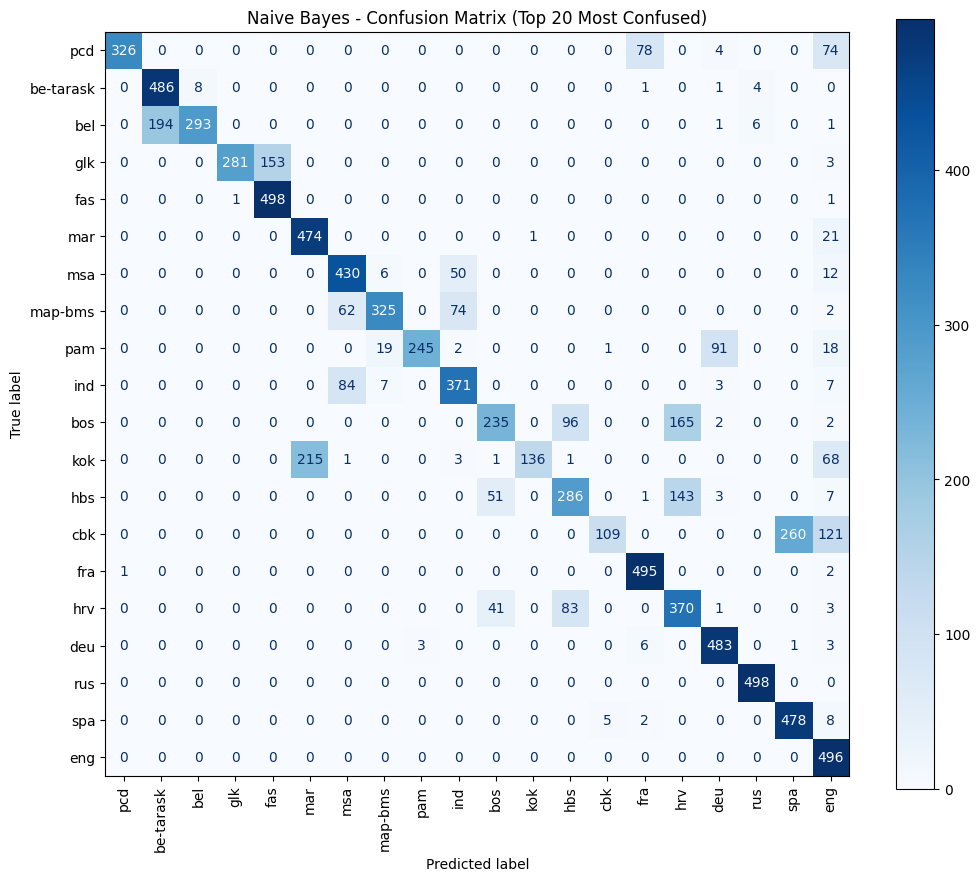

In [8]:
cm = confusion_matrix(y_test_encoded, y_pred)
# Zero diagonal to focus on errors
errors = cm.copy()
np.fill_diagonal(errors, 0)
confusion_sums = errors.sum(axis=1) + errors.sum(axis=0)

# Get Top 20 most confused languages
N = 20
top_n_indices = np.argsort(confusion_sums)[-N:]

# Slice matrix
small_cm = cm[np.ix_(top_n_indices, top_n_indices)]
small_labels = [label_encoder.classes_[i] for i in top_n_indices]

# Plot smaller confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=small_cm, display_labels=small_labels)
disp.plot(ax=ax, xticks_rotation='vertical', values_format='.0f', cmap='Blues')
plt.title(f"Naive Bayes - Confusion Matrix (Top {N} Most Confused)")
plt.show()

fig.savefig("NB_confusion_matrix_top20.png", dpi=300, bbox_inches='tight')